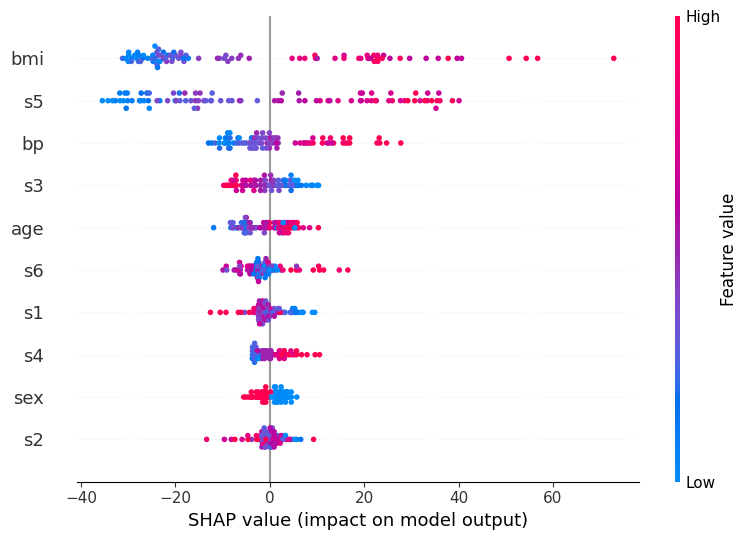

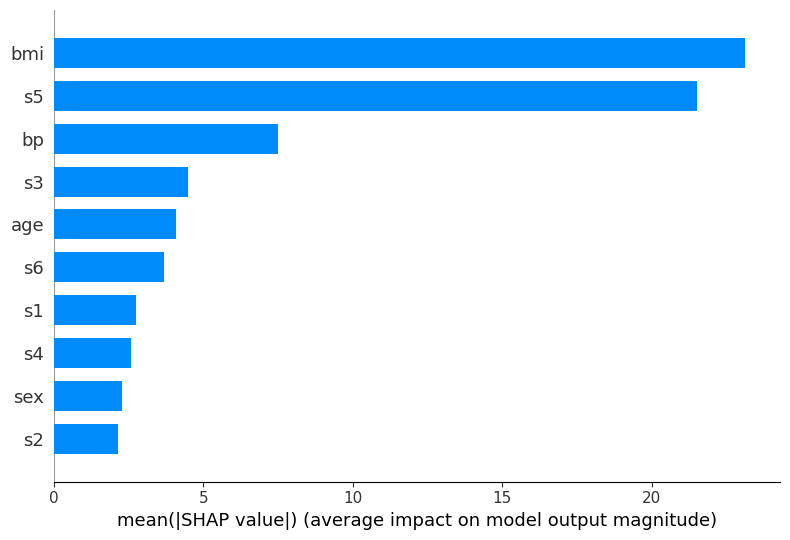

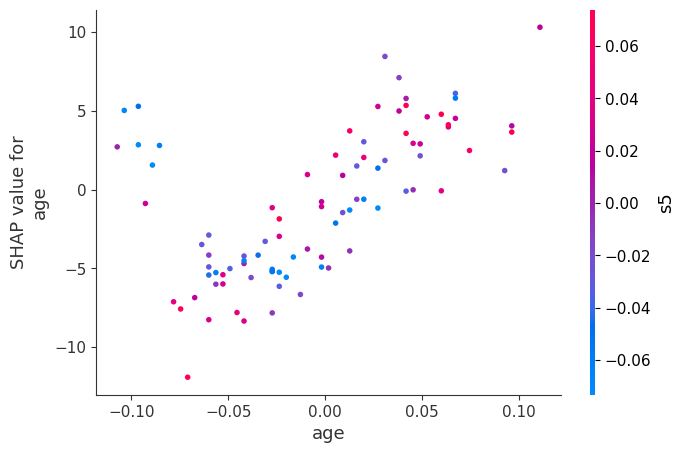

In [4]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# データの読み込みと分割
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの学習
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# SHAP値の計算 
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test, check_additivity=False)

# SHAP summary plot 
shap.summary_plot(shap_values, X_test, feature_names=data.feature_names)

# SHAP bar plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=data.feature_names)

# SHAP dependence plot
shap.dependence_plot(0, shap_values.values, X_test, feature_names=data.feature_names)
